<a href="https://colab.research.google.com/github/givani30/CS4240_DeepLearning/blob/main/Pytorch_tensors_a_small_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and import

The python package name for Pytorch is `torch`. In order for it to be used, you must first of all **install** it. Please run the following lines of code to install it (or if already installed, check if it indeed is) and import it immediately after (including `numpy` and `matplotlib.pyplot` which will also be needed in this tutorial): 


In [1]:
!pip3 install torch

import torch                    #pytorch
import numpy as np              #numpy --> working with numpy arrays is a prerequisite for this introduction
import matplotlib.pyplot as plt #matplotlib

## 1D tensors introduction

Let's start simple and introduce how to instantiate a 1D-tensor and perform some relatively simple manipulations to them. 

- `torch.tensor([1,2,3])`: creates the following 64-bit 1-D tensor $[1,2,3]$
- `torch.FloatTensor([1,2,3])`: creates the following 32-bit 1-D floating point tensor $[1.,2.,3.]$
- type and data type can be checked using `.type` and `.dtype`
- Slicing is similar to numpy :)
- Re-arrangements are mostly done using `.view` (*to get a view!*, it shares the same underlying data with its base structure: avoids explicit data copying $\rightarrow$ efficient)
  - The shape (could) change: from 1-D to 5-D, 3-D to 2-D, etc.
  - Shapes (of input and output) should be compatible: from (6) to (3,2) is possible, but to (4,5) is NOT.
- Size can be checked with `.size` (similar to numpy, BUT it does retrieve the size *per dimension*)


In [2]:
#create 1D tensor in pytorch
v = torch.tensor([1,2,3,4,5,6]) #creates int64-valued tensor

print(v)
print(v[:4])    #normal slicing, as in numpy
print(v.dtype)  #torch.tensor creates int64-valued tensor
print(v.type()) #type by default is LongTensor

tensor([1, 2, 3, 4, 5, 6])
tensor([1, 2, 3, 4])
torch.int64
torch.LongTensor


In [3]:
#create floating point tensor
f = torch.FloatTensor([1,2,3,4,5,6]) #creates float32-valued tensors

print(f)
print(f.dtype)  #floating point values
print(f.type()) #LongTensor
print(f.size()) #retrieves the size of the tensor - slightly different from numpy

tensor([1., 2., 3., 4., 5., 6.])
torch.float32
torch.FloatTensor
torch.Size([6])


In [4]:
#re-arrange tensors using tensor.view()
v_6 = v.view(6,1)       #re-aranges the tensor (6 in row, 1 in column)
v_minus = v.view(3, -1) #re-aranges the tensor (3 in row, -1 (=remainder) in column)

print(v_6)
print('')
print(v_minus)
print('')
print(v_minus.size())

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

tensor([[1, 2],
        [3, 4],
        [5, 6]])

torch.Size([3, 2])


Conversions between numpy arrays and pytorch tensors often happens. It's really easy (in both directions):

- `torch.from_numpy()`: from numpy array to pytorch tensor
- `.numpy()`: from pytorch tensor to numpy array

In [5]:
#conversion between numpy and pytorch
a = np.array([1,2,3,4,5])         #numpy array
tensor_cnv = torch.from_numpy(a)  #from numpy.array to torch.tensor

print(tensor_cnv)
print(tensor_cnv.type()) #LongTensor

tensor([1, 2, 3, 4, 5], dtype=torch.int32)
torch.IntTensor


In [ ]:
numpy_cnv = tensor_cnv.numpy() #from torch.tensor to numpy.array
print(numpy_cnv)

## General operations on 1D tensors

Now that we know how to create and manipulate tensors, we would actually like to do something with them. Addition, multiplication, dot-product, exponentials, sigmoids, etc. It's (almost) exactly the same as numpy. Have a look at the following examples. If you plot a tensor using `matplotlib.pyplot` make sure to convert the tensor to an actual perceivable array (such as numpy).

In [6]:
#universal operations on tensors (highly similar to numpy)

t_one = torch.tensor([1, 2, 3])
t_two = torch.tensor([2, 7, 8])

t_add  = t_one + t_two            #pointwise addition
t_pm   = t_one * t_two            #pointwise multiplication
t_dot  = torch.dot(t_one, t_two)  #dot product between two tensors

print(t_add)
print(t_pm)
print(t_dot)

tensor([ 3,  9, 11])
tensor([ 2, 14, 24])
tensor(40)


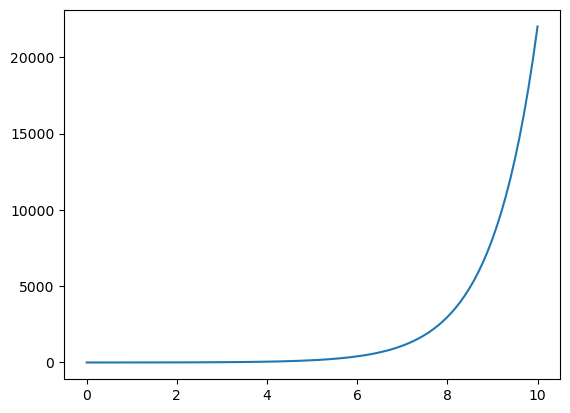

In [7]:
#universal functions on tensors (highly similar to numpy)

x = torch.linspace(0, 10, 100) #from 0 tot 10, number of steps by default: 100
y = torch.exp(x)               #exponential

plt.plot(x.numpy(), y.numpy()) #plots x vs y (don't forget to convert to array)

##Higher dimensional tensors

We have already seen some examples of 2-dimensional tensors - using the view function to reshape a 1-dimensional one. The dimension of a tensor can be checked using `.dim()` (can you think of another way?). Some extra functions and examples are provided below:   

In [8]:
#creating 2D tensors
one_d = torch.arange(2, 14, 1) #one d tensor from 2 to 13 (stops just before 14)
two_d = one_d.view(6, -1)      #creates 2D-tensor: 6 x remainder(= 2)

print(one_d)
print(two_d)
print(one_d.dim(), two_d.dim()) #prints the dimensions of both tensors (= 1, 2)

tensor([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
tensor([[ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13]])
1 2


In [ ]:
#slicing 2D tensors is similar to numpy

print(two_d[2,1])

In [9]:
#creating 3D tensors

three_d = torch.arange(18).view(3,3,2) #create 3D-tensor 3 x 3 x 2
print(three_d) 

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])


In [ ]:
#slicing 3D tensors is similar to numpy

#  1. first the blocks (in this case consisting of 6 elements (or 3 x 2 tensors) each)
#  2. second the row 
#  3. finally the column

#if we want to find 14 --> 1. [2], 2. [1], 3. [0]
print(three_d[2, 1, 0])

#if we want the whole 2nd block 
print(three_d[1, :, :]) #: for whole range

Matrix multiplication - NOT pointwise, but by structure - is the (THE!) working horse in deep learning: layer-to-layer connections are efficiently implemented using it. Luckily, it is really convenient how to do so and takes only a single small line using `torch.matmul(A, B)` which specifically implements $\mathbf{A} \cdot \mathbf{B}$. 

In [ ]:
#matrix multiplication

mat_a = torch.rand(8).view(4,2) #random (uniformly distributed on [0, 1)) 4 x 2 matrix
mat_b = torch.rand(8).view(2,4) #random 2 x 4 matrix

#torch.mm (until 2D) and torch.matmul (all D)
mat_mm = torch.matmul(mat_a, mat_b) #matrix multiplication --> mat_a times mat_b

print(mat_a); 
print('')
print(mat_b); 
print('')
print(mat_mm) #should be 4x4

## Derivatives: the awesome embedded `.backward` function

**Derivates** are essential for the second tribe - the connectionists - of machine learning scientists. (You thought that only neural networks are crucial in machine learning? Yes, they are a big and provably crucial part, but there are other tribes (the symbolists, evolutionaries, bayesians, and analogizers) that develop learners in completely different ways - and yes there are people trying to combine both\*). Let's not drift off and keep focused. 

Essential? Neural networks update their parameters using their gradients (with respect to some cost function). Luckily, again, Pytorch makes our lives terribly easy and intuitive. Say you have some function $y$ which is some function of $x$:

$$ y = f(x) $$

If specified, `y.backward` finds that derivative, $\frac{dy}{dx}$ and `x.grad` finds the value, $\frac{dy}{dx} \left( x\right)$,  for the gradient at the point x. If a variable depends on more than one variable, a similar strategy can be used - including partial derivates (see the example in the second code block). Concerning neural networks, what could $y$ and $x$ represent here? 



In [10]:
# normal derivative
x = torch.tensor(2.0, requires_grad = True) #gradient w.r.t. to x can only be computed as required_grad = True (False by default)
y = 9*x**3 + 2*x**2                         #9x^3 + 2x^2

y.backward()  #finds derivative w.r.t. its arguments, which are only x in this case
print(x.grad) #finds the value dy/dx (at x)

tensor(116.)


In [11]:
#partial derivatives

z = torch.tensor(3.0, requires_grad = True) #create new variable z
y = 9*x**3 + 2*z**2                         #9x^3 + 2z^2

y.backward()
print(x.grad) #dy/dx (at x, z)
print(z.grad) #dy/dz (at y, z)

tensor(224.)
tensor(12.)
